# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


# Read in Dataset
### NOTE: You will need to upload the dataset yourself and name it 'dataset'

In [ ]:
dataset = pd.read_excel("dataset.xlsx")
df = pd.DataFrame(dataset)
df

,CrashID,Degree_of_crash,Degree_of_crash_detailed,Reporting_year,Year_of_crash,Month_of_crash,Day_of_week_of_crash,Two_hour_intervals,Street_of_crash,Street_type,...,DCA_description,DCA_supplement,First_impact_type,Key_TU_type,Other_TU_type,No_of_traffic_units_involved,No_killed,No_seriously_injured,No_moderately_injured,No_minor_other_injured
0,1122708,Fatal,Fatal,2017.0,2017.0,January,Monday,18:00 - 19:59,HOLLOWAYS,RD,...,Off cway right bend,Left,Rollover,Station wagon,NaN,1,1,0,0,0
1,1122709,Fatal,Fatal,2017.0,2017.0,January,Monday,12:00 - 13:59,PUTTY,RD,...,Opp - Head on,NaN,Head-on,Motorcycle,Light truck,3,1,1,1,0
2,1122710,Fatal,Fatal,2017.0,2017.0,January,Tuesday,14:00 - 15:59,IRRIGATION,WAY,...,Same - Rear right,NaN,Rear end,Artic tanker,Car (sedan/hatch),3,2,0,1,0
3,1123942,Fatal,Fatal,2017.0,2017.0,January,Thursday,10:00 - 11:59,VARDYS,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Semi-trailer,Pedestrian,2,1,0,1,0
4,1123948,Fatal,Fatal,2017.0,2017.0,January,Saturday,12:00 - 13:59,PRINCES,HWY,...,Opp - Head on,NaN,Head-on,Car (sedan/hatch),4 wheel drive,2,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101713,1298478,Injury,Minor/Other Injury,2021.0,2021.0,May,Tuesday,10:00 - 11:59,EMPIRE BAY,DR,...,Off left bend into obj,Left,Vehicle - Object,Car (sedan/hatch),NaN,1,0,0,0,1
101714,1298482,Injury,Minor/Other Injury,2021.0,2021.0,July,Saturday,12:00 - 13:59,DENHAM COURT,RD,...,Opp - Right-thru,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),2,0,0,0,1
101715,1299029,Non-casualty (towaway),Non-casualty (towaway),2021.0,2021.0,February,Tuesday,06:00 - 07:59,MARYLAND,DR,...,Opp - Right-thru,NaN,Other angle,4 wheel drive,Light truck utility(from 2018),2,0,0,0,0
101716,1299030,Non-casualty (towaway),Non-casualty (towaway),2021.0,2021.0,November,Monday,16:00 - 17:59,MONA VALE,RD,...,On path - Previous accident,NaN,Other angle,Car (sedan/hatch),Station wagon,4,0,0,0,0


# Cleaning Data

In [ ]:
# Remove all incidents in 2016 as per assignment spec
df = df[df['Year_of_crash'] != 2016]

In [ ]:
# Count the number of NaNs in each column
nan_count = df.isnull().sum()
# Print out the count of NaNs for each column
print(nan_count)
print(df.dtypes)

CrashID                              0
Degree_of_crash                      0
Degree_of_crash_detailed             4
Reporting_year                       4
Year_of_crash                        4
Month_of_crash                       4
Day_of_week_of_crash                 5
Two_hour_intervals                   5
Street_of_crash                      4
Street_type                          4
Distance                             3
Direction                            4
Identifying_feature                  4
Identifying_feature_type             0
Town                                 1
Route_no                         36704
School_zone_location                 1
School_zone_active                   1
Type_of_location                     2
Latitude                             3
Longitude                            3
LGA                                  3
Urbanisation                         2
Alignment                            2
Primary_permanent_feature        76947
Primary_temporary_feature

In [ ]:
# Remove 'Route_no', 'Primary_permanent_feature', 'Primary_temporary_feature', 'Primary_hazardous_feature', 'DCA_supplement', 'Other_TU_type'
df = df.drop(['Route_no', 'Primary_permanent_feature', 'Primary_temporary_feature', 'Primary_hazardous_feature', 'DCA_supplement', 'Other_TU_type'], axis=1)
df

,CrashID,Degree_of_crash,Degree_of_crash_detailed,Reporting_year,Year_of_crash,Month_of_crash,Day_of_week_of_crash,Two_hour_intervals,Street_of_crash,Street_type,...,RUM_description,DCA_code,DCA_description,First_impact_type,Key_TU_type,No_of_traffic_units_involved,No_killed,No_seriously_injured,No_moderately_injured,No_minor_other_injured
0,1122708,Fatal,Fatal,2017.0,2017.0,January,Monday,18:00 - 19:59,HOLLOWAYS,RD,...,Off left/right bend,801,Off cway right bend,Rollover,Station wagon,1,1,0,0,0
1,1122709,Fatal,Fatal,2017.0,2017.0,January,Monday,12:00 - 13:59,PUTTY,RD,...,Head on,201,Opp - Head on,Head-on,Motorcycle,3,1,1,1,0
2,1122710,Fatal,Fatal,2017.0,2017.0,January,Tuesday,14:00 - 15:59,IRRIGATION,WAY,...,Right rear,303,Same - Rear right,Rear end,Artic tanker,3,2,0,1,0
3,1123942,Fatal,Fatal,2017.0,2017.0,January,Thursday,10:00 - 11:59,VARDYS,RD,...,Ped on carriageway,4,Ped - On carriageway,Vehicle - Pedestrian,Semi-trailer,2,1,0,1,0
4,1123948,Fatal,Fatal,2017.0,2017.0,January,Saturday,12:00 - 13:59,PRINCES,HWY,...,Head on,201,Opp - Head on,Head-on,Car (sedan/hatch),2,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101713,1298478,Injury,Minor/Other Injury,2021.0,2021.0,May,Tuesday,10:00 - 11:59,EMPIRE BAY,DR,...,Off lft/lft bnd=>obj,804,Off left bend into obj,Vehicle - Object,Car (sedan/hatch),1,0,0,0,1
101714,1298482,Injury,Minor/Other Injury,2021.0,2021.0,July,Saturday,12:00 - 13:59,DENHAM COURT,RD,...,Right through,202,Opp - Right-thru,Other angle,Car (sedan/hatch),2,0,0,0,1
101715,1299029,Non-casualty (towaway),Non-casualty (towaway),2021.0,2021.0,February,Tuesday,06:00 - 07:59,MARYLAND,DR,...,Right through,202,Opp - Right-thru,Other angle,4 wheel drive,2,0,0,0,0
101716,1299030,Non-casualty (towaway),Non-casualty (towaway),2021.0,2021.0,November,Monday,16:00 - 17:59,MONA VALE,RD,...,Accident,603,On path - Previous accident,Other angle,Car (sedan/hatch),4,0,0,0,0


# Part A

Investigating the suburbs with the highest number of crashes

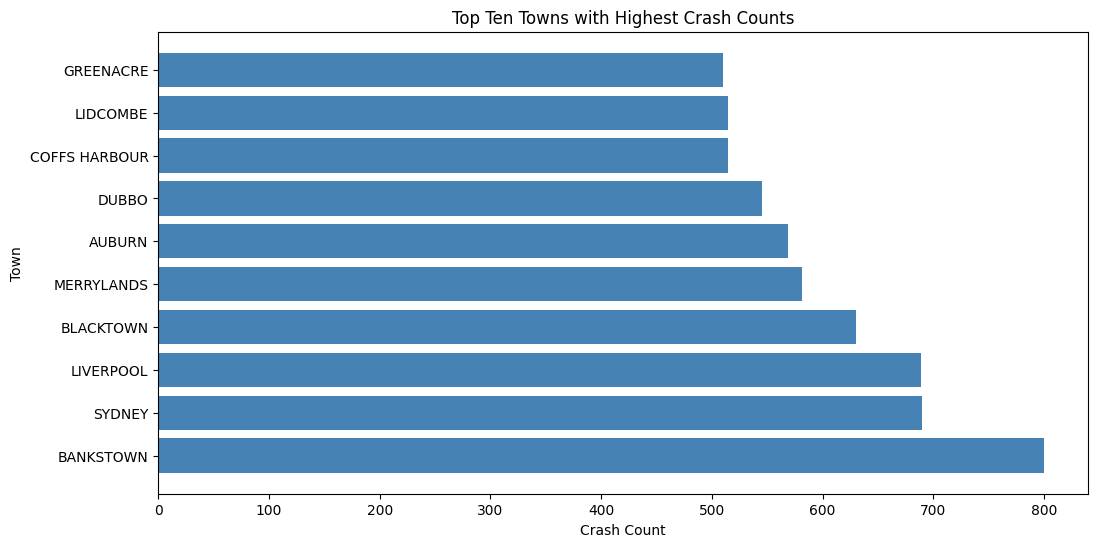

In [ ]:
# Drop rows with missing values in the 'Town' column. Rows with NaN values in other columns remain unaffected.
parta_q1_df = df.dropna(subset=['Town'])
# Group by Town and count the number of crashes
crash_counts = parta_q1_df.groupby('Town')['CrashID'].count()
# Sort and select the top 10 in ascending order
top_10_towns = crash_counts.sort_values(ascending=True).tail(10)
# Reverse the order for ascending display
top_10_towns = top_10_towns.iloc[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_towns.index, top_10_towns.values, color='steelblue')
plt.title('Top Ten Suburbs with Highest Crash Counts')
plt.xlabel('Crash Count')
plt.ylabel('Town')
plt.show()

Question 2: Proportion of fatalities occurring in different weather conditions

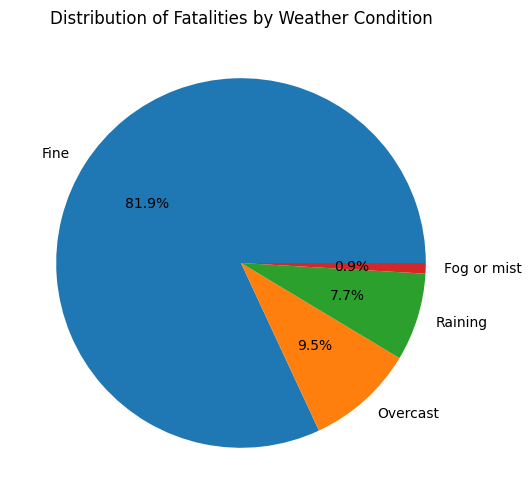

In [ ]:
# Data manipulation
parta_q2_df = df[df['No_killed'] >= 1]
weather_count = parta_q2_df.groupby('Weather').agg({'No_killed': 'sum'}).reset_index()
weather_count = weather_count[weather_count['Weather'] != 'Unknown']
top_weather = weather_count.sort_values(by='No_killed', ascending=False).head(4)

# Plot
plt.figure(figsize=(12, 6))
plt.pie(top_weather['No_killed'], labels=top_weather['Weather'], autopct='%1.1f%%')
plt.title('Distribution of Fatalities by Weather Condition')
plt.show()

Question 3: Distribution of the number of people killed on the road by month and year

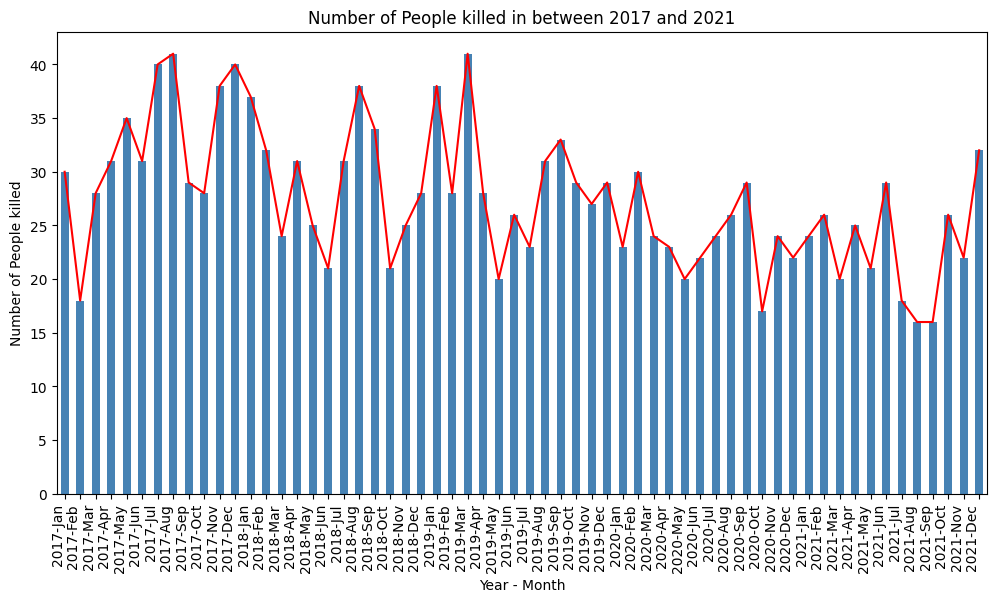

In [ ]:
# Make copy of DataFrame
def copy_dataframe(df):
    return df.copy()

# Create order of months
def order_months(df):
    ordered_months = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }
    # Sort dates numerically
    df['Ordered_Month'] = df['Month_of_crash'].map(ordered_months)
    return df.sort_values(by=['Year_of_crash', 'Ordered_Month'])

# Function to manipulate data
def manipulate_data(df):
    # Create a new dataframe with aggregated data Year_ofcrash, Month_of_crash and Ordered_month
    date_killed = df.groupby(['Year_of_crash', 'Month_of_crash', 'Ordered_Month']).agg({'No_killed': 'sum'}).reset_index()
    # Organise dataframe chronologically
    date_killed = date_killed.sort_values(by=['Year_of_crash', 'Ordered_Month'])
    # Create x axis label
    date_killed['Short_Month'] = date_killed['Month_of_crash'].str.slice(0, 3) # Extracts first three letter to get a month name abbreviation
    date_killed['Year_of_crash'] = date_killed['Year_of_crash'].astype(int) # Converting years into an integer
    date_killed['Year - Month'] = date_killed['Year_of_crash'].astype(str) + '-' + date_killed['Short_Month']
    return date_killed

# Function to generate plot
def generate_plot(data):
    ax = data.plot(x='Year - Month', y='No_killed', kind='bar', color='steelblue', figsize=(12, 6), legend=False)
    data.plot(x='Year - Month', y='No_killed', kind='line', ax=ax, color='red', legend=False)
    ax.set_xticklabels(data['Year - Month'], rotation=90, ha='right')
    ax.set_ylabel('Number of People killed')
    ax.set_title('Number of People killed in between 2017 and 2021')
    plt.show()

# Execute functions
df_copy = copy_dataframe(df)
ordered_df = order_months(df_copy)
manipulated_df = manipulate_data(ordered_df)
generate_plot(manipulated_df)

Question 4: Number of fatalities and injuries by year

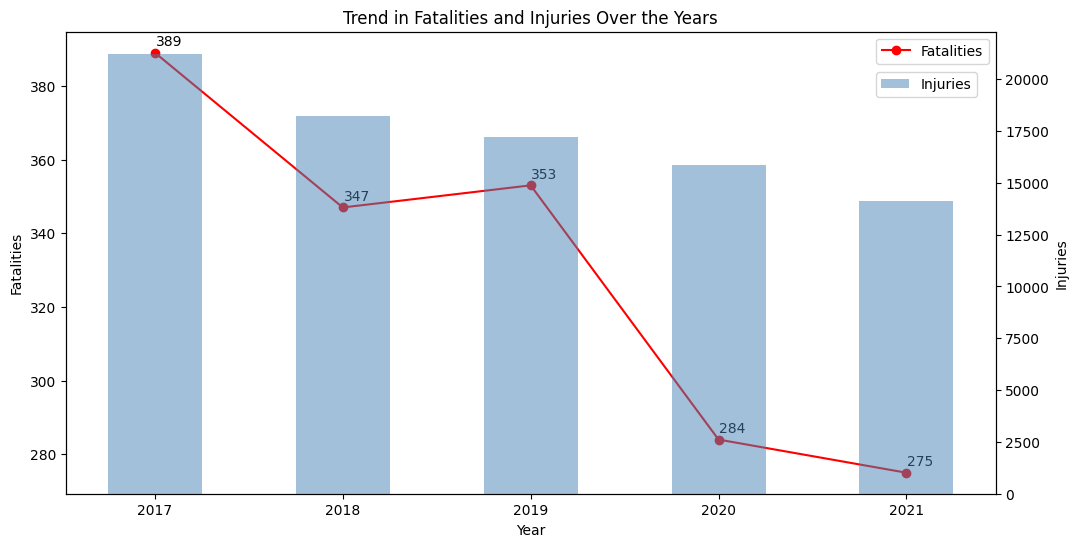

In [ ]:
# Clone the original dataframe to avoid altering the original
df_clone = df.copy()

# Aggregate data by 'Year_of_crash' and compute the sum of the required columns
aggregate_data = df_clone.groupby('Year_of_crash').agg({
    'No_killed': 'sum',
    'No_seriously_injured': 'sum',
    'No_moderately_injured': 'sum',
    'No_minor_other_injured': 'sum'
}).reset_index()

# Compute total injuries for each year
aggregate_data['Total_Injuries'] = (aggregate_data['No_seriously_injured'] +
                                   aggregate_data['No_moderately_injured'] +
                                   aggregate_data['No_minor_other_injured'])

# Renaming columns for better readability
aggregate_data.rename(columns={
    'No_killed': 'Fatalities',
    'Year_of_crash': 'Year'
}, inplace=True)

# Initialize the plot with specified size
fig, primary_axis = plt.subplots(figsize=(12, 6))

# Plot fatalities data
primary_axis.plot(aggregate_data['Year'], aggregate_data['Fatalities'],
                  color='red', marker='o', label='Fatalities')

# Setting x and y axis labels
primary_axis.set_xlabel('Year')
primary_axis.set_ylabel('Fatalities', color='black')

# Define the ticks on the x-axis based on the 'Year' column
primary_axis.set_xticks(aggregate_data['Year'])

# Annotate the fatality values on the plot
for year, fatality_count in zip(aggregate_data['Year'], aggregate_data['Fatalities']):
    primary_axis.annotate(str(fatality_count), (year, fatality_count),
                          textcoords="offset points", xytext=(10,5), ha='center')

# Create a secondary axis (for injuries) using twinx() to overlay the plots
secondary_axis = primary_axis.twinx()

# Plot injuries data as a bar graph on the secondary axis
secondary_axis.bar(aggregate_data['Year'], aggregate_data['Total_Injuries'],
                   color='steelblue', alpha=0.5, label='Injuries', width=0.5)

# Set labels for the secondary axis
secondary_axis.set_ylabel('Injuries', color='black')

# Position the primary legend in the upper right corner
legend_primary = primary_axis.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Get the height of the primary legend
legend_height = legend_primary.get_window_extent().transformed(fig.transFigure.inverted()).height

# Position the secondary legend exactly under the primary legend, adjusting with the height
secondary_axis.legend(loc='upper right', bbox_to_anchor=(0.987, 0.97 - legend_height))

# Setting the title for the overall figure
plt.title("Trend in Fatalities and Injuries Over the Years")

# Display the plot
plt.show()


Question 5: Relationship between speed limit and accident statistics

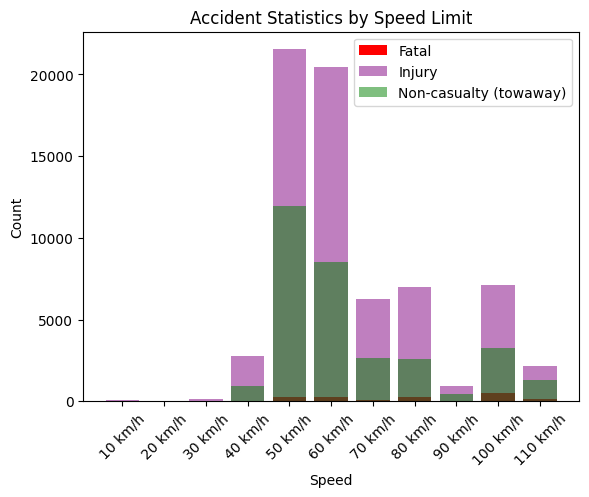

In [ ]:
# Make copy of DataFrame
parta_q5_df = df.copy()

# Drop unknown values
drop_unknown_values = parta_q5_df.drop(df[df['Speed_limit'] == 'Unknown'].index)

# Make a copy of dataframe with unknown values removed
clean_df = drop_unknown_values.copy()

# Map speed limit to sort in ascending order
speed_map = {
    '10 km/h': 1,
    '20 km/h': 2,
    '30 km/h': 3,
    '40 km/h': 4,
    '50 km/h': 5,
    '60 km/h': 6,
    '70 km/h': 7,
    '80 km/h': 8,
    '90 km/h': 9,
    '100 km/h': 10,
    '110 km/h': 11
}

# Sort and group data for plot
clean_df['Speed_order'] = clean_df['Speed_limit'].map(speed_map)
grouping = clean_df.groupby(['Speed_order', 'Speed_limit', 'Degree_of_crash']).size().unstack(fill_value=0)

# Plot data
plt.bar(x = grouping.index.get_level_values('Speed_limit'), height = grouping['Fatal'], alpha = 1, color = 'red')
plt.bar(x = grouping.index.get_level_values('Speed_limit'), height = grouping['Injury'], alpha = 0.5, color = 'purple')
plt.bar(x = grouping.index.get_level_values('Speed_limit'), height = grouping['Non-casualty (towaway)'], alpha = 0.5, color = 'green')
plt.legend(['Fatal', 'Injury', 'Non-casualty (towaway)'])
plt.xlabel('Speed')
plt.ylabel('Count')
plt.title('Accident Statistics by Speed Limit')
plt.tick_params(axis='x', labelrotation=45)

Question 6: Most notorious locations in terms of number of crashes

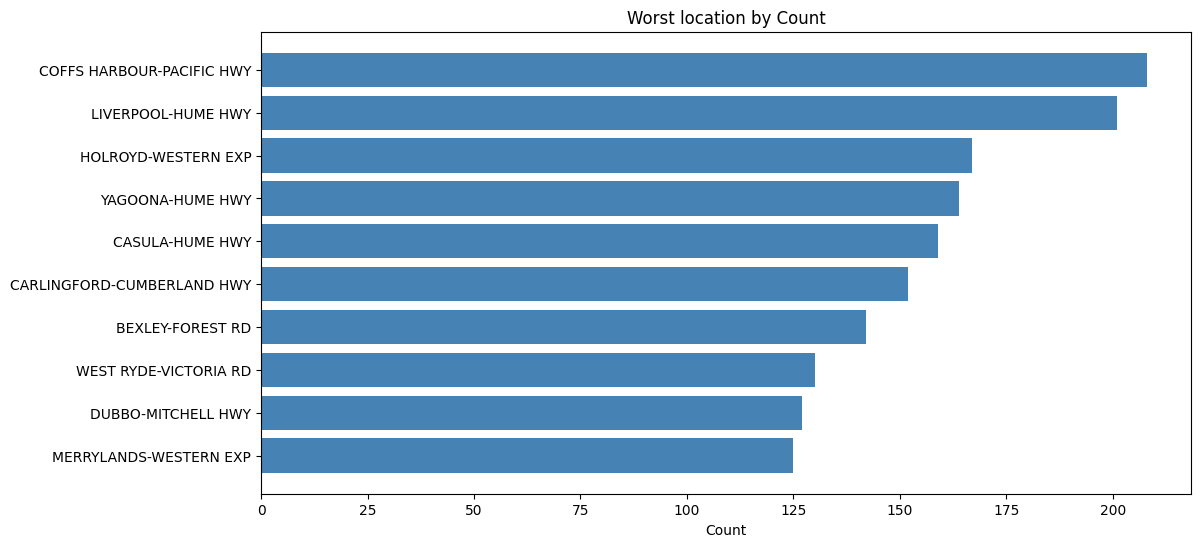

In [ ]:
# Create a copy of the DataFrame
parta_q6_df = df.copy()

# Drop rows with missing values in the 'Town', 'Street_of_crash', and 'Street_type' columns
parta_q6_df.dropna(subset=['Town', 'Street_of_crash', 'Street_type'], inplace=True)

# Create new column 'Location' that combines the 3 columns in format 'Town-Street_of_crash Street_type'
parta_q6_df['Location'] = parta_q6_df['Town'] + '-' + parta_q6_df['Street_of_crash'] + ' ' + parta_q6_df['Street_type']

# Count crashes by the Location
location_crash_counts = parta_q6_df.groupby('Location')['CrashID'].count()

# Sort and select the top 10 (bottom 10 from an ascending list)
notorious_locations = location_crash_counts.sort_values(ascending=True).tail(10)

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(notorious_locations.index, notorious_locations.values, color='steelblue')
plt.xlabel('Count')
plt.title('Worst location by Count')
plt.show()

Question 7: Change in fatalities and serious injuries from 2017-2021 heatmap

In [ ]:
parta_q7_df = df.copy()

# Calculate magnitude
parta_q7_df['Magnitude'] = parta_q7_df['No_killed'] + parta_q7_df['No_seriously_injured']

# Filter out rows where magnitude is 0
zero_mag = parta_q7_df[parta_q7_df['Magnitude'] != 0]

# Drop rows where 'Year_of_crash' is NaN before converting to integer
zero_mag = zero_mag.dropna(subset=['Year_of_crash'])
zero_mag['Year_of_crash'] = zero_mag['Year_of_crash'].astype(int)

# Rename the column
zero_mag.rename(columns={'Year_of_crash': 'Year'}, inplace=True)

# Create the density heatmap
fig = px.density_mapbox(zero_mag, lat='Latitude', lon='Longitude', z='Magnitude', radius=10,
                        center=dict(lat=-34, lon=151), zoom=8,
                        mapbox_style="open-street-map", animation_frame='Year')

fig.show()

# Group by 'Year' and sum the 'Magnitude'
yearly_magnitude = zero_mag.groupby('Year')['Magnitude'].sum()

# Calculate the percent change year over year
percent_change_yearly = yearly_magnitude.pct_change() * 100

# The result will be a series where the index is the year and the values are the percent changes
print(percent_change_yearly)

<ipython-input-12-4559a7395ce8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_mag['Year_of_crash'] = zero_mag['Year_of_crash'].astype(int)
<ipython-input-12-4559a7395ce8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_mag.rename(columns={'Year_of_crash': 'Year'}, inplace=True)


Year
2017          NaN
2018    -5.747888
2019   -13.093146
2020    -5.904954
2021   -16.935311
Name: Magnitude, dtype: float64


# Part B

Question 1: Linear Regression - Predicting crash severity using speed limits

Mean Squared Error: 0.2385131004571515
R^2 Score: 0.0012730475426947496
Intercept: 0.6333812802761261
Coefficient for Speed_limit: 0.0010741753783578378


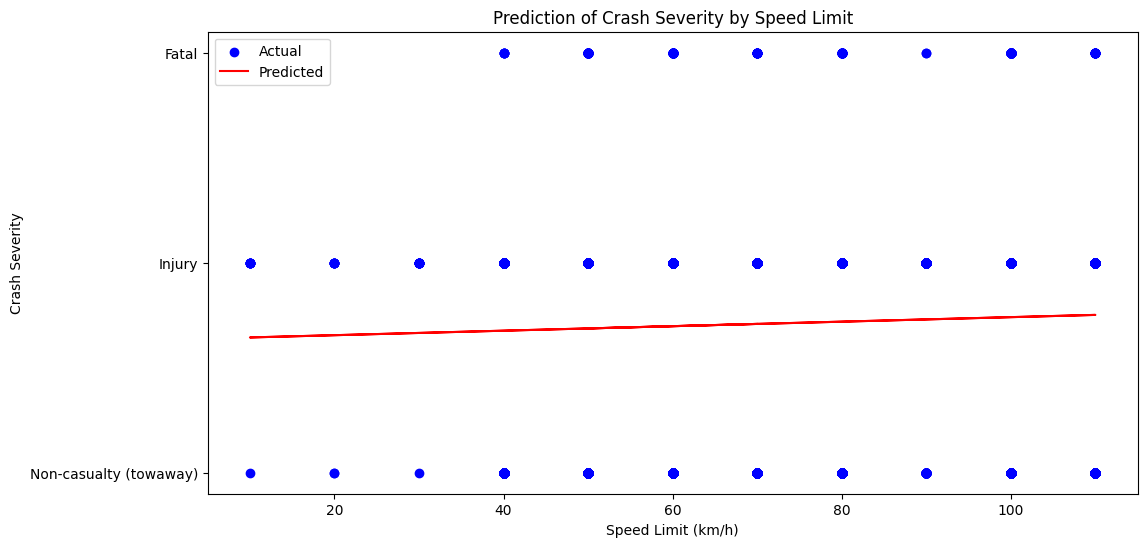

In [ ]:
# Clone the df
partb_q1_df = df.copy()
# Drop rows where 'Degree_of_crash' and 'Speed_limit' are empty
partb_q1_df.dropna(subset=['Degree_of_crash', 'Speed_limit'], inplace=True)

# Remove ' km/h' from 'Speed_limit' and convert to numeric, setting 'Unknown' to NaN
# Using loc to ensure we are working on the DataFrame view and not on a copy
partb_q1_df.loc[:, 'Speed_limit_numeric'] = pd.to_numeric(
    partb_q1_df['Speed_limit'].str.replace(' km/h', ''), errors='coerce')

# Drop rows with 'Unknown' speed limit if you decide not to impute them
partb_q1_df.dropna(subset=['Speed_limit_numeric'], inplace=True)

# Map 'Degree_of_crash' to numerical values
partb_q1_df.loc[:, 'Degree_of_crash_encoded'] = partb_q1_df['Degree_of_crash'].map({
    'Non-casualty (towaway)': 0, 'Injury': 1, 'Fatal': 2
})

# Selecting the predictor and the response
X = partb_q1_df[['Speed_limit_numeric']]  # Predictor
y = partb_q1_df['Degree_of_crash_encoded']  # Response

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the performance metrics and model coefficients
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Intercept: {linear_model.intercept_}')
print(f'Coefficient for Speed_limit: {linear_model.coef_[0]}')

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.yticks([0, 1, 2], ["Non-casualty (towaway)", "Injury", "Fatal"])
plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Crash Severity')
plt.title('Prediction of Crash Severity by Speed Limit')
plt.legend()
plt.show()

Question 2: Linear Regression - Predicting crash severity using time and day of the week


<ipython-input-22-b895e84f69bf>:17: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-22-b895e84f69bf>:20: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-22-b895e84f69bf>:28: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

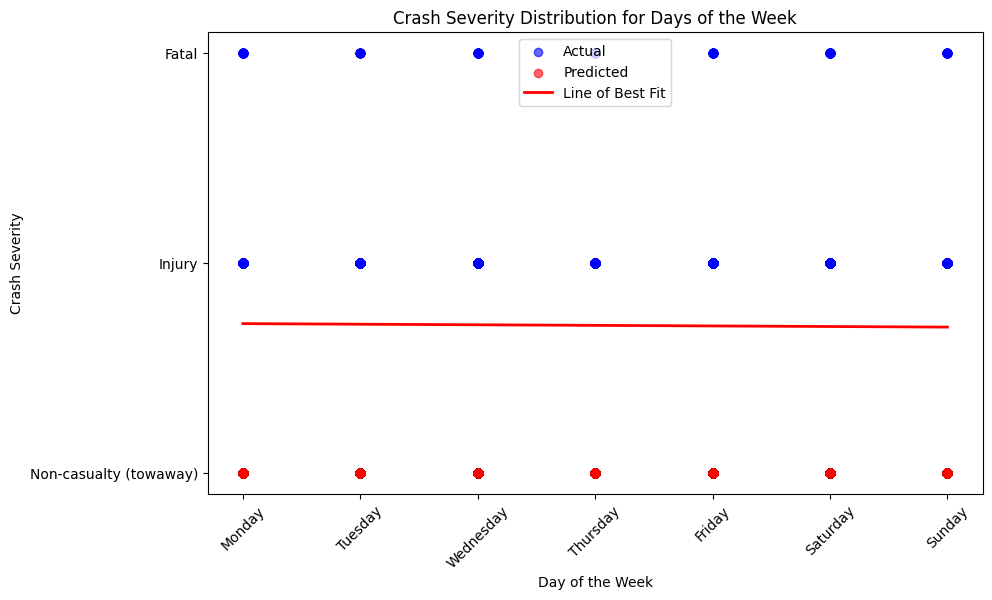

In [ ]:
#Quentin Attempt 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
partb_q2_df = df.copy()

# Drop rows where 'Degree_of_crash', 'Day_of_week_of_crash', or 'Two_hour_intervals' is Null
partb_q2_df.dropna(subset=['Degree_of_crash', 'Day_of_week_of_crash', 'Two_hour_intervals'], inplace=True)

# Convert 'Degree_of_crash' and 'Day_of_week_of_crash' to numerical values
day_to_int = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
partb_q2_df.loc[:, 'Day_of_week_of_crash'] = partb_q2_df['Day_of_week_of_crash'].map(day_to_int)

crash_severity_mapping = {'Non-casualty (towaway)': 0, 'Injury': 1, 'Fatal': 2}
partb_q2_df.loc[:, 'Degree_of_crash'] = partb_q2_df['Degree_of_crash'].map(crash_severity_mapping)

# Convert 'Two_hour_intervals' to integers
interval_to_int = {
    '00:01 - 01:59': 1, '02:00 - 03:59': 2, '04:00 - 05:59': 3, '06:00 - 07:59': 4,
    '08:00 - 09:59': 5, '10:00 - 11:59': 6, '12:00 - 13:59': 7, '14:00 - 15:59': 8,
    '16:00 - 17:59': 9, '18:00 - 19:59': 10, '20:00 - 21:59': 11, '22:00 - 23:59': 12
}
partb_q2_df.loc[:, 'Two_hour_intervals'] = partb_q2_df['Two_hour_intervals'].map(interval_to_int)

# Handle any NaN values in the DataFrame
imputer = SimpleImputer(strategy='mean')
partb_q2_df[['Day_of_week_of_crash', 'Two_hour_intervals']] = imputer.fit_transform(partb_q2_df[['Day_of_week_of_crash', 'Two_hour_intervals']])

# Set X and y
X = partb_q2_df[['Day_of_week_of_crash', 'Two_hour_intervals']]
y = partb_q2_df['Degree_of_crash']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predict for test set
y_pred = regr.predict(X_test)

# Convert the numerical predictions back to categorical labels for plotting
severity_inverse_mapping = {0: 'Non-casualty (towaway)', 1: 'Injury', 2: 'Fatal'}
y_test_labels = y_test.map(severity_inverse_mapping)
y_pred_labels = pd.Series(y_pred).map(lambda x: severity_inverse_mapping[round(x)])



# Visualization and analysis
# Visualization and analysis
plt.figure(figsize=(10, 6))

# Scatter plots for actual and predicted values
plt.scatter(X_test['Day_of_week_of_crash'], y_test_labels, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['Day_of_week_of_crash'], y_pred_labels, color='red', label='Predicted', alpha=0.6)

# Line of best fit
# Since we only use 'Day_of_week_of_crash' for x-axis in the plot,
# we create an array of values representing all days of the week
x_values_for_line = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
# Using the average value for 'Two_hour_intervals' as it's not shown in this 2D plot
average_interval = np.mean(X_train['Two_hour_intervals'])
# Create a 2D array combining 'Day_of_week_of_crash' with the average 'Two_hour_intervals'
combined_x_for_line = np.hstack([x_values_for_line, np.full_like(x_values_for_line, average_interval)])
# Predict y-values for these x-values
y_values_for_line = regr.predict(combined_x_for_line)

# Plotting the line of best fit
plt.plot(x_values_for_line, y_values_for_line, color='red', linewidth=2, label='Line of Best Fit')

# Labeling
plt.xticks(range(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Crash Severity')
plt.yticks([0, 1, 2], ["Non-casualty (towaway)", "Injury", "Fatal"])
plt.title('Crash Severity Distribution for Days of the Week')
plt.legend()
plt.show()



Question 3: Logistic Regression - Predicting crash severity using weather, road alignment and road classification

<ipython-input-15-3439360ed8cb>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Training Accuracy: 0.6893
Test Accuracy: 0.6826
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      6455
           1     0.6826    1.0000    0.8113     13879

    accuracy                         0.6826     20334
   macro avg     0.3413    0.5000    0.4057     20334
weighted avg     0.4659    0.6826    0.5538     20334



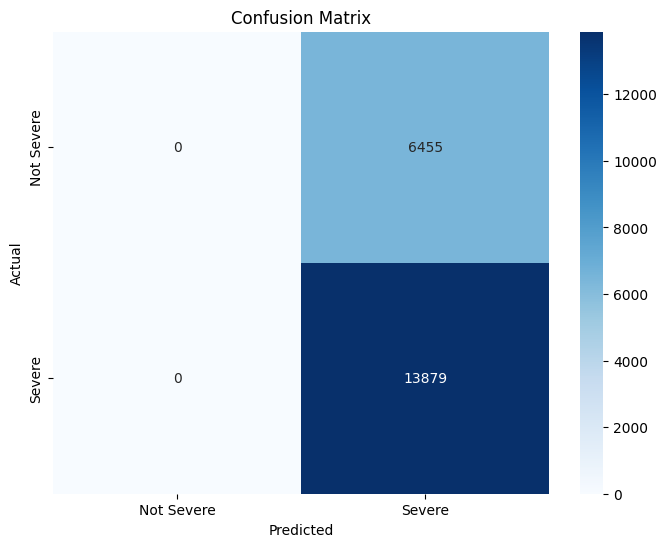

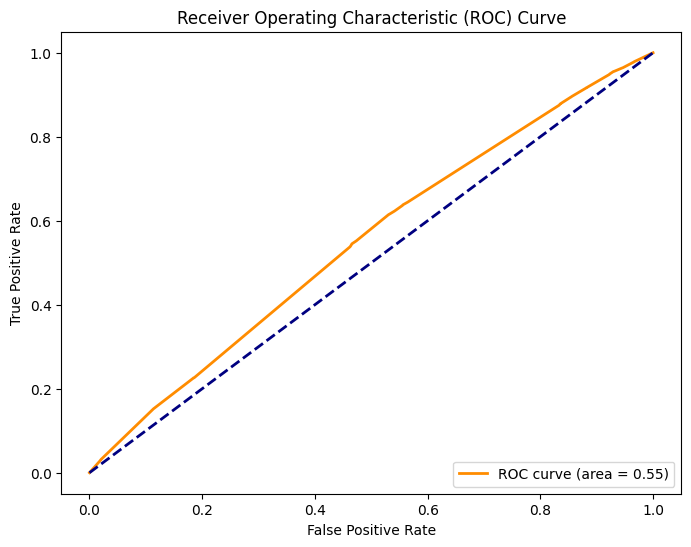

Training Accuracy after SMOTE: 0.5349
Test Accuracy after SMOTE: 0.5443
              precision    recall  f1-score   support

           0     0.3535    0.5256    0.4227      6455
           1     0.7148    0.5529    0.6235     13879

    accuracy                         0.5443     20334
   macro avg     0.5342    0.5393    0.5231     20334
weighted avg     0.6001    0.5443    0.5598     20334



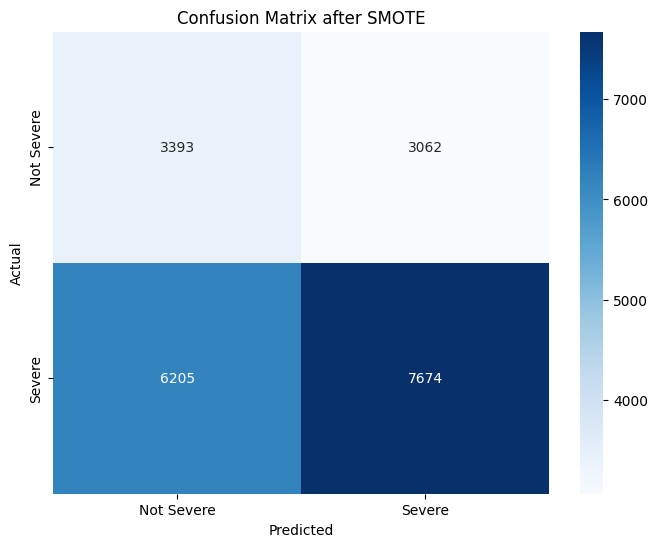

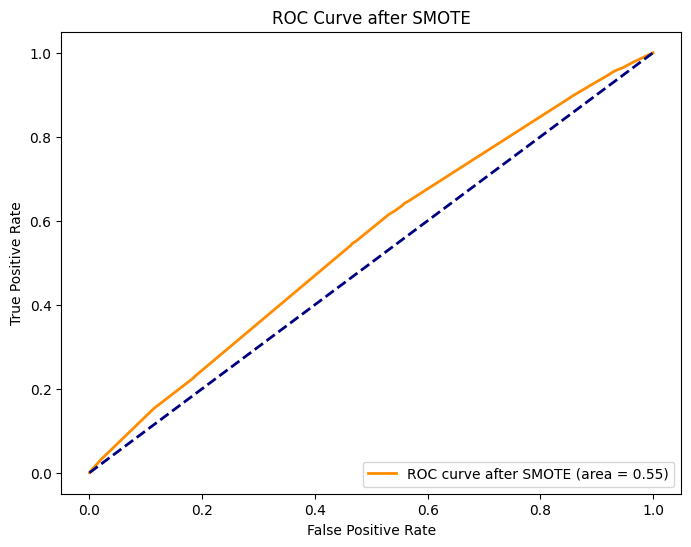

In [ ]:
partb_q3_df = df.copy()

# Drop rows where 'Degree_of_crash', 'Weather', 'Alignment', 'Road_classification' is null
partb_q3_df = partb_q3_df.dropna(subset=['Degree_of_crash', 'Weather', 'Alignment', 'Road_classification'])

# Map 'Degree_of_crash' to a binary variable where 1 represents severe and 0 represents not severe.
partb_q3_df['Is_severe'] = partb_q3_df['Degree_of_crash'].map({'Fatal': 1, 'Injury': 1, 'Non-casualty (towaway)': 0})

# Select the features for the model
features = partb_q3_df[['Weather', 'Alignment', 'Road_classification']]

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False)
features_encoded = encoder.fit_transform(features)

# Prepare the target variable
target = partb_q3_df['Is_severe']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Initialise and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the training accuracy
training_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Evaluate the test accuracy
test_accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluate the model
print(classification_report(y_test, predictions, zero_division=0, digits=4))

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Severe', 'Severe'],
            yticklabels=['Not Severe', 'Severe'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the test set for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
partb_q2_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {partb_q2_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Implementing SMOTE


# Create the SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model on the resampled data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Predict on the original test set (not the SMOTE'd data)
predictions_smote = model_smote.predict(X_test)

# Evaluate the training accuracy on the SMOTE'd data
training_accuracy_smote = model_smote.score(X_train_smote, y_train_smote)
print(f"Training Accuracy after SMOTE: {training_accuracy_smote:.4f}")

# Evaluate the test accuracy
test_accuracy_smote = accuracy_score(y_test, predictions_smote)
print(f"Test Accuracy after SMOTE: {test_accuracy_smote:.4f}")

# Evaluate the model
print(classification_report(y_test, predictions_smote, zero_division=0, digits=4))

# Compute the confusion matrix
cm_smote = confusion_matrix(y_test, predictions_smote)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Severe', 'Severe'],
            yticklabels=['Not Severe', 'Severe'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix after SMOTE')
plt.show()

# Predict probabilities for the test set for ROC curve after SMOTE
y_probs_smote = model_smote.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_probs_smote)

# Calculate AUC score
auc_smote = roc_auc_score(y_test, y_probs_smote)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label=f'ROC curve after SMOTE (area = {auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after SMOTE')
plt.legend(loc="lower right")
plt.show()


Question 4

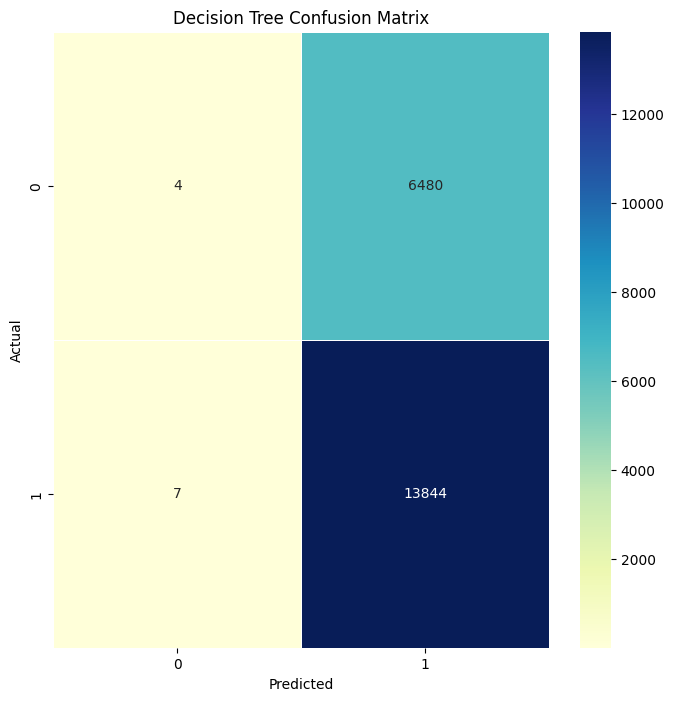

In [ ]:
df.loc[:, 'Severe_crash'] = (
    (df['No_seriously_injured'] > 0) |
    (df['No_moderately_injured'] > 0) |
    (df['No_minor_other_injured'] > 0)
).astype(int)

# Removing all incidents in the year 2016 to clean the dataframe
df_cleaned = df.copy()

# Cleaning the 'Speed_limit' column by handling 'Unknown' values
# Assuming we want to replace 'Unknown' with NaN and then fill with the median of known speed limits
df_cleaned['Speed_limit'] = df_cleaned['Speed_limit'].str.replace(' km/h', '')  # Remove ' km/h'
df_cleaned['Speed_limit'] = df_cleaned['Speed_limit'].replace('Unknown', np.nan)  # Replace 'Unknown' with NaN
df_cleaned['Speed_limit'] = df_cleaned['Speed_limit'].astype(float)  # Convert to float to handle NaNs
median_speed_limit = df_cleaned['Speed_limit'].median(skipna=True)  # Calculate median of known speed limits
df_cleaned['Speed_limit'] = df_cleaned['Speed_limit'].fillna(median_speed_limit).astype(int)  # Replace NaN with median and convert to int

# Encoding 'Weather' as a numeric variable using LabelEncoder
le = LabelEncoder()
df_cleaned['Weather_encoded'] = le.fit_transform(df_cleaned['Weather'])

# Define the features and the target again with the cleaned 'Speed_limit'
X = df_cleaned[['Weather_encoded', 'Speed_limit']]
y = df_cleaned['Severe_crash']

# Split the dataset into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier again
dt_cla = DecisionTreeClassifier(random_state=42)
dt_cla.fit(X_train, y_train)

# The model is now trained, we can proceed to make predictions and evaluate the model

# Predicting the Test set results
y_pred = dt_cla.predict(X_test)

# Making the Confusion Matrix
dtcla_cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Scoring the model
dtcla_score = dt_cla.score(X_test, y_test)
print(f'Decision Tree Classification Accuracy: {dtcla_score: .4f}')
print(classification_report(y_test, y_pred, digits=4))

# Find feature importances, and sort by descending
importance = dt_cla.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

Decision Tree Classification Accuracy:  0.6810
              precision    recall  f1-score   support

           0     0.3636    0.0006    0.0012      6484
           1     0.6812    0.9995    0.8102     13851

    accuracy                         0.6810     20335
   macro avg     0.5224    0.5001    0.4057     20335
weighted avg     0.5799    0.6810    0.5522     20335

           Feature  Importance
1      Speed_limit    0.669334
0  Weather_encoded    0.330666


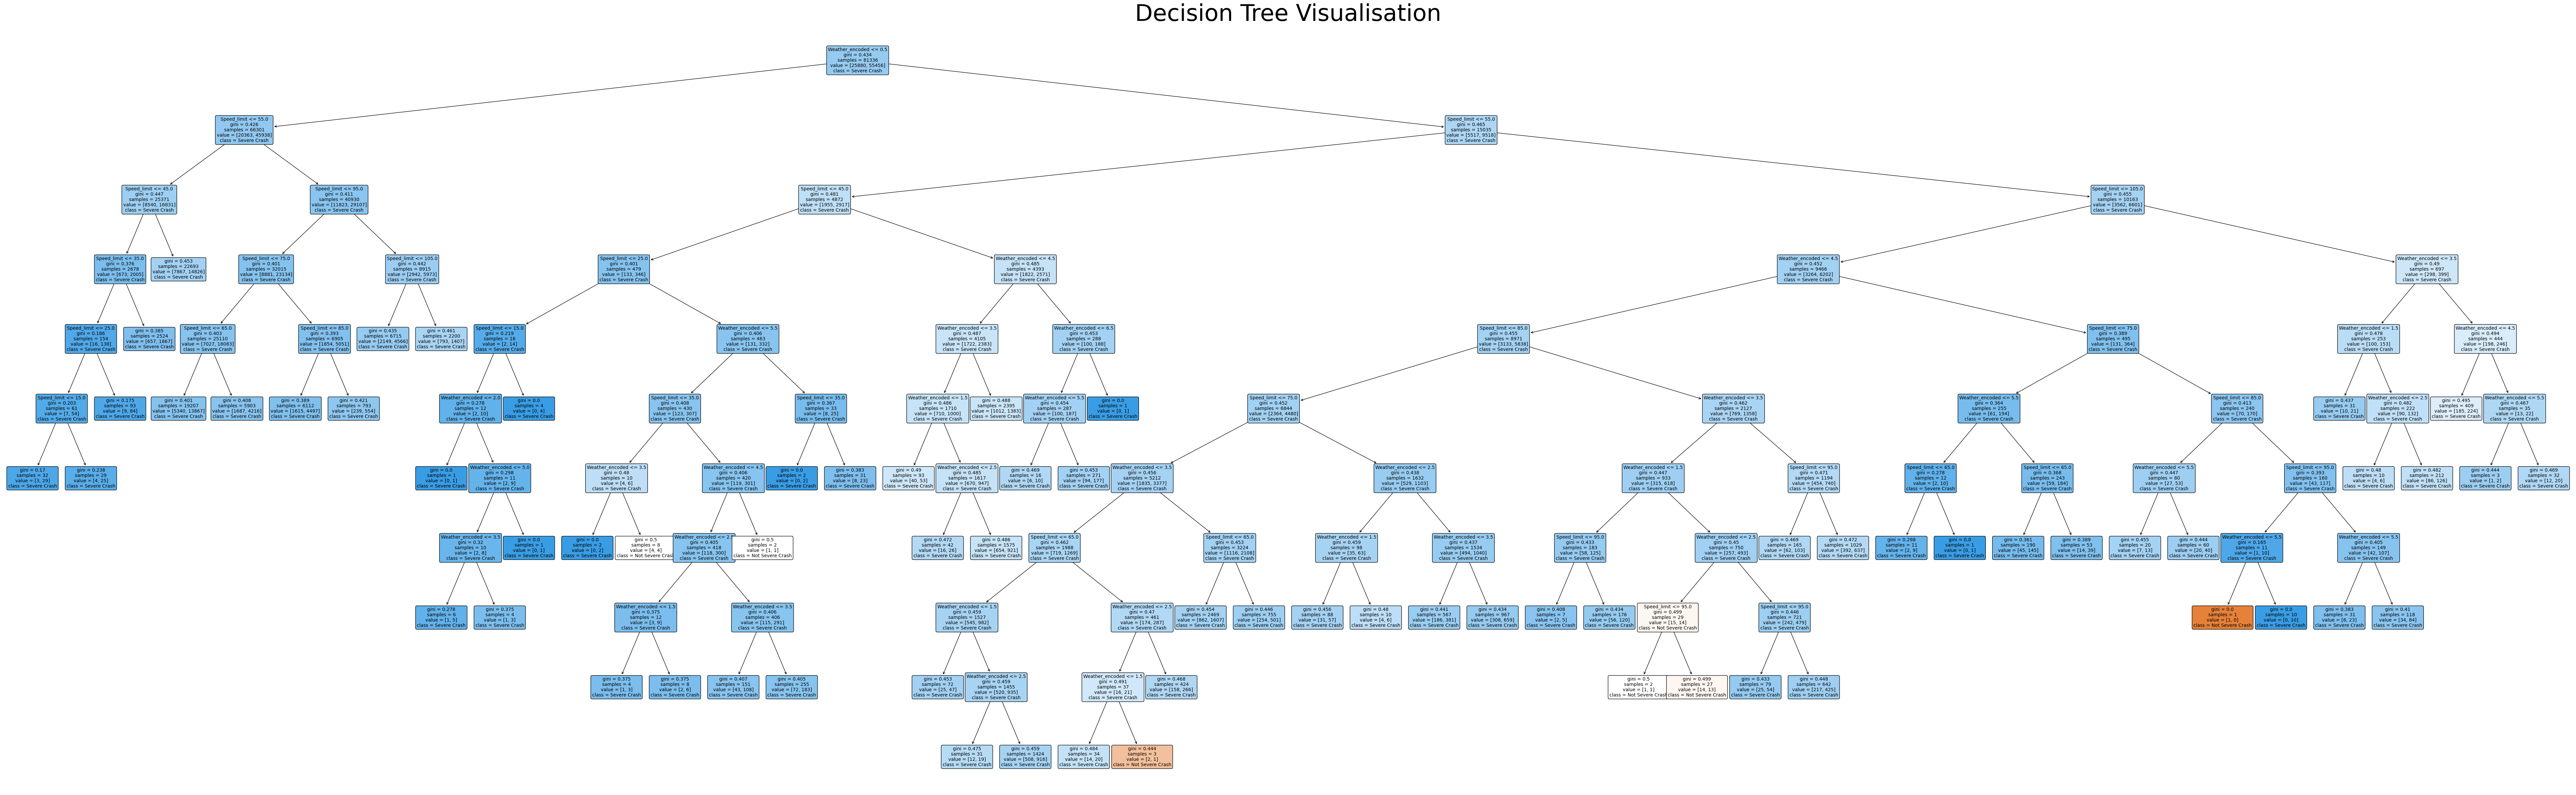

In [ ]:
# Visualise Decision Tree
plt.figure(figsize=(100, 30))
tree.plot_tree(dt_cla, filled=True, feature_names=['Weather_encoded', 'Speed_limit'], class_names=['Not Severe Crash', 'Severe Crash'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualisation', fontsize=50)
plt.show()

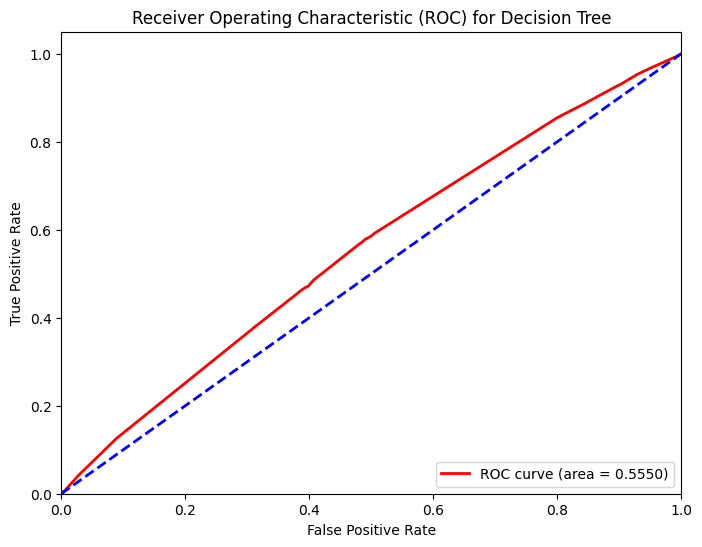

In [ ]:
# Directly compute the probabilities from training model 'dt_cla' and test set 'X_test'
y_prob = dt_cla.predict_proba(X_test)[:, 1]

# Compute the ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Decision Tree')
plt.legend(loc="lower right")
plt.show()


                         Feature  Importance
16               Street_lighting    0.132926
9                           Town    0.095416
5                Street_of_crash    0.087481
13                           LGA    0.063027
2                 Month_of_crash    0.057037
28                   Key_TU_type    0.057000
25               RUM_description    0.054130
4             Two_hour_intervals    0.050109
26               DCA_description    0.042495
3           Day_of_week_of_crash    0.041260
7                       Distance    0.033641
23                   Speed_limit    0.030896
20              Natural_lighting    0.029715
6                    Street_type    0.028771
27             First_impact_type    0.023142
12              Type_of_location    0.020185
1                  Year_of_crash    0.019452
8                      Direction    0.018920
0                 Reporting_year    0.018212
29  No_of_traffic_units_involved    0.013245
14                  Urbanisation    0.013156
22        

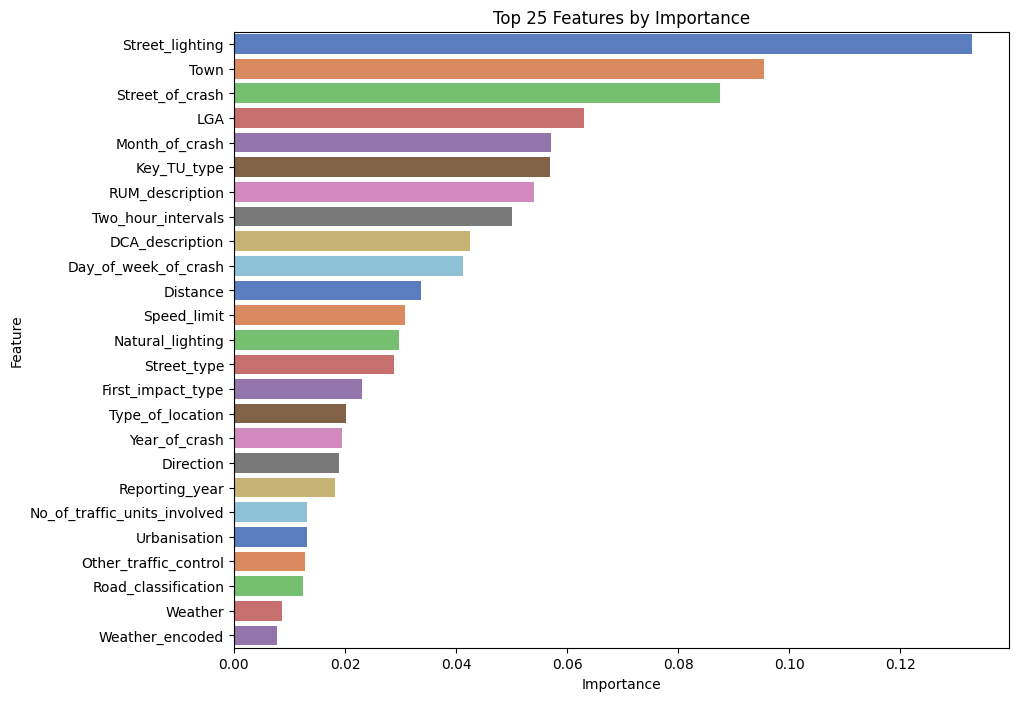

In [ ]:
# Encode numerical variables in dataset
cat_feat = df_cleaned.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
df_cleaned[cat_feat] = df_cleaned[cat_feat].apply(lambda col: label_encoder.fit_transform(col))

# Drop severe-defining and code columns
feat_dropped = df_cleaned.drop(['Degree_of_crash', 'Degree_of_crash_detailed', 'RUM_code', 'Longitude', 'Latitude', 'DCA_code', 'Identifying_feature','Identifying_feature_type'], axis=1)

# Define variables, drop those used to define a severe crash previously
X_feat = feat_dropped.drop(['Severe_crash', 'No_killed', 'No_moderately_injured', 'No_seriously_injured', 'No_minor_other_injured', 'CrashID'], axis=1)
y_feat = feat_dropped['Severe_crash']

# Fill in NaN values for numeric and categorical columns with mean and mode
X_feat_filled = X_feat.fillna(X_feat.mean())
X_feat_filled = X_feat_filled.fillna(X_feat_filled.mode().iloc[0])

# Split dataset
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat_filled, y_feat, test_size=0.2, random_state=42)

# Train Classifier
dt_cla_feat = DecisionTreeClassifier(random_state=42)
dt_cla_feat.fit(X_train_feat, y_train_feat)

# Find top 25 Features by Feature Importance
importance = dt_cla_feat.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_feat.columns, 'Importance': importance})
top_25_features = feature_importance.nlargest(25, 'Importance')
print(top_25_features)

# Plot top 25 features in a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_25_features.sort_values(by='Importance', ascending=False), palette='muted')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 25 Features by Importance')
plt.show()
